In [35]:
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
from glob import glob

file_names = sorted(glob('dataset/2022*.xls'))
file_names

['dataset\\2022년 01월  교통카드 통계자료.xls',
 'dataset\\2022년 02월  교통카드 통계자료.xls',
 'dataset\\2022년 03월  교통카드 통계자료.xls',
 'dataset\\2022년 04월  교통카드 통계자료.xls',
 'dataset\\2022년 05월  교통카드 통계자료.xls',
 'dataset\\2022년 06월  교통카드 통계자료.xls',
 'dataset\\2022년 07월  교통카드 통계자료.xls',
 'dataset\\2022년 08월  교통카드 통계자료.xls',
 'dataset\\2022년 09월  교통카드 통계자료.xls']

In [3]:
sheets = ['버스정류장별 이용현황', '지하철 노션별 역별 이용현황', '지하철 유무임별 이용현황', '지하철 시간대별 이용현황']

In [4]:
df_columns = ['사용월', '노선ID', '노선번호', '노선명', '버스정류장ID', '버스정류장명', '승차승객수', '하차승객수','작업일시']

In [4]:
df = pd.read_excel(file_names[0], sheet_name=sheets[3])
del df['작업일시']

In [5]:
df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', 'Unnamed: 5',
       '05:00:00~05:59:59', 'Unnamed: 7', '06:00:00~06:59:59', 'Unnamed: 9',
       '07:00:00~07:59:59', 'Unnamed: 11', '08:00:00~08:59:59', 'Unnamed: 13',
       '09:00:00~09:59:59', 'Unnamed: 15', '10:00:00~10:59:59', 'Unnamed: 17',
       '11:00:00~11:59:59', 'Unnamed: 19', '12:00:00~12:59:59', 'Unnamed: 21',
       '13:00:00~13:59:59', 'Unnamed: 23', '14:00:00~14:59:59', 'Unnamed: 25',
       '15:00:00~15:59:59', 'Unnamed: 27', '16:00:00~16:59:59', 'Unnamed: 29',
       '17:00:00~17:59:59', 'Unnamed: 31', '18:00:00~18:59:59', 'Unnamed: 33',
       '19:00:00~19:59:59', 'Unnamed: 35', '20:00:00~20:59:59', 'Unnamed: 37',
       '21:00:00~21:59:59', 'Unnamed: 39', '22:00:00~22:59:59', 'Unnamed: 41',
       '23:00:00~23:59:59', 'Unnamed: 43', '00:00:00~00:59:59', 'Unnamed: 45',
       '01:00:00~01:59:59', 'Unnamed: 47', '02:00:00~02:59:59', 'Unnamed: 49',
       '03:00:00~03:59:59', 'Unnamed: 51'],
      dtype='objec

In [6]:
col_name = [*df.columns[:4]]
for i in range(4,len(df.columns)-1,2):
    if 'Unnamed' in df.columns[i+1]: 
        time = int(df.columns[i][:2])%24 if df.columns[i][:2] != '00' else 24 
        col_name.append(f'{time}시_승차')
        col_name.append(f'{time}시_하차')
col_name = col_name[:4] + col_name[-6:] + col_name[4:-6]

In [7]:
df

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2022-01,1호선,1.0,서울역,530,14,"7,194","5,587","10,201","34,337",...,"8,521","5,862",28,506,0,0,0,0,0,0
2,2022-01,1호선,10.0,동묘앞,111,1,"2,206",727,"2,815","3,923",...,866,"1,774",4,854,0,0,0,0,0,0
3,2022-01,1호선,2.0,시청,27,0,"1,610","4,157","2,623","17,377",...,"2,405",912,8,99,0,0,0,0,0,0
4,2022-01,1호선,3.0,종각,87,2,"1,954","3,686","2,712","19,130",...,"4,526","1,133",6,124,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2022-01,우이신설선,721.0,북한산보국문,4,2,"1,758",463,"5,551","1,909",...,629,"2,614",0,0,0,0,0,0,0,0
607,2022-01,우이신설선,722.0,정릉,1,0,"1,832",427,"4,360","1,636",...,399,"1,650",0,0,0,0,0,0,0,0
608,2022-01,우이신설선,723.0,성신여대입구(돈암),1,0,681,401,946,"1,052",...,747,824,0,0,0,0,0,0,0,0
609,2022-01,우이신설선,724.0,보문,0,0,491,174,593,"1,133",...,323,492,0,13,0,0,0,0,0,0


In [8]:
print(', '.join(col_name))

사용월, 호선명, 역ID, 지하철역, 1시_승차, 1시_하차, 2시_승차, 2시_하차, 3시_승차, 3시_하차, 4시_승차, 4시_하차, 5시_승차, 5시_하차, 6시_승차, 6시_하차, 7시_승차, 7시_하차, 8시_승차, 8시_하차, 9시_승차, 9시_하차, 10시_승차, 10시_하차, 11시_승차, 11시_하차, 12시_승차, 12시_하차, 13시_승차, 13시_하차, 14시_승차, 14시_하차, 15시_승차, 15시_하차, 16시_승차, 16시_하차, 17시_승차, 17시_하차, 18시_승차, 18시_하차, 19시_승차, 19시_하차, 20시_승차, 20시_하차, 21시_승차, 21시_하차, 22시_승차, 22시_하차, 23시_승차, 23시_하차, 24시_승차, 24시_하차


In [9]:
# for name , new_name in zip(df.columns, col_name):
#     df.rename(columns = {name : new_name} )
df = df.set_axis(col_name, axis = 'columns')
df = df.drop(index = 0)

In [10]:
def concat_subway(file_names):
    raw = pd.DataFrame()
    
    for file_name in file_names:
        df = pd.read_excel(file_name, sheet_name=sheets[3])
        del df['작업일시']
        col_name = [*df.columns[:4]]
        
        for i in range(4,len(df.columns)-1,2):
            if 'Unnamed' in df.columns[i+1]: 
                time = int(df.columns[i][:2])%24 if df.columns[i][:2] != '00' else 24 
                col_name.append(f'{time}시_승차')
                col_name.append(f'{time}시_하차')
        
        col_name = col_name[:4] + col_name[-6:] + col_name[4:-6]
        df = df.set_axis(col_name, axis = 'columns').drop(index = 0)
        
        raw = pd.concat([raw, df], ignore_index=True)
        print(raw.shape)
    
    return raw

raw = concat_subway(file_names)    

(610, 52)
(1218, 52)
(1827, 52)
(2435, 52)
(3050, 52)
(3665, 52)
(4280, 52)
(4897, 52)
(5512, 52)


In [11]:
raw

,사용월,호선명,역ID,지하철역,1시_승차,1시_하차,2시_승차,2시_하차,3시_승차,3시_하차,...,20시_승차,20시_하차,21시_승차,21시_하차,22시_승차,22시_하차,23시_승차,23시_하차,24시_승차,24시_하차
0,2022-01,1호선,1.0,서울역,530,14,"7,194","5,587","10,201","34,337",...,"8,521","5,862",28,506,0,0,0,0,0,0
1,2022-01,1호선,10.0,동묘앞,111,1,"2,206",727,"2,815","3,923",...,866,"1,774",4,854,0,0,0,0,0,0
2,2022-01,1호선,2.0,시청,27,0,"1,610","4,157","2,623","17,377",...,"2,405",912,8,99,0,0,0,0,0,0
3,2022-01,1호선,3.0,종각,87,2,"1,954","3,686","2,712","19,130",...,"4,526","1,133",6,124,0,0,0,0,0,0
4,2022-01,1호선,4.0,종로3가,124,15,"2,110","2,375","2,416","10,706",...,"2,951","1,402",33,345,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5507,2022-09,신림선,4407.0,당곡,0,0,"1,305",114,"3,140",811,...,819,"3,073",194,"1,050",1,4,0,0,0,0
5508,2022-09,신림선,4408.0,신림,1,0,650,143,901,546,...,654,"1,885",227,749,0,7,0,0,0,0
5509,2022-09,신림선,4409.0,서원,2,0,"1,614",125,"2,811",475,...,323,"3,543",105,"1,215",1,4,0,0,0,0
5510,2022-09,신림선,4410.0,서울대벤처타운,4,0,"4,115",181,"6,370","1,949",...,"1,428","8,396",374,"4,131",1,147,0,0,0,0


In [12]:
raw.to_csv("dataset/2022_tmoney_subway_concat.csv", index=False)

In [54]:
df = pd.read_csv("dataset/2022_tmoney_subway.csv",low_memory=False) 

In [55]:
df

,사용월,호선명,역ID,지하철역,승하차시간,승하차인원,시간,승하차
0,2022-01,1호선,1.0,서울역,1시_승차,530,1시,승차
1,2022-01,1호선,10.0,동묘앞,1시_승차,111,1시,승차
2,2022-01,1호선,2.0,시청,1시_승차,27,1시,승차
3,2022-01,1호선,3.0,종각,1시_승차,87,1시,승차
4,2022-01,1호선,4.0,종로3가,1시_승차,124,1시,승차
...,...,...,...,...,...,...,...,...
264571,2022-09,신림선,4407.0,당곡,24시_하차,0,24시,하차
264572,2022-09,신림선,4408.0,신림,24시_하차,0,24시,하차
264573,2022-09,신림선,4409.0,서원,24시_하차,0,24시,하차
264574,2022-09,신림선,4410.0,서울대벤처타운,24시_하차,0,24시,하차


In [56]:
del df['승하차시간']

In [57]:
del df['역ID']

In [58]:
df['시간'] = df['시간'].str.replace('시','')
df['승하차인원'] = df['승하차인원'].str.replace(',','').map(lambda x : int(x))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264576 entries, 0 to 264575
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   사용월     264576 non-null  object
 1   호선명     264576 non-null  object
 2   지하철역    264576 non-null  object
 3   승하차인원   264576 non-null  int64 
 4   시간      264576 non-null  object
 5   승하차     264576 non-null  object
dtypes: int64(1), object(5)
memory usage: 12.1+ MB


In [59]:
df['사용월'] = pd.to_datetime(df['사용월']).dt.strftime('%Y-%m')

In [60]:
df['호선명'] = df['호선명'].str.replace('9호선2~3단계','9호선')

In [61]:
df['호선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '경부선', '경인선', '경원선', '안산선', '과천선',
       '분당선', '일산선', '중앙선', '장항선', '경의선', '경춘선', '수인선', '경강선', '5호선',
       '6호선', '7호선', '8호선', '9호선', '공항철도 1호선', '우이신설선', '신림선'],
      dtype=object)

In [62]:
pd.set_option('display.float_format', '{:.1f}'.format)

In [63]:
df.describe()

,승하차인원
count,264576.0
mean,12264.5
std,19865.3
min,0.0
25%,671.0
50%,5965.0
75%,15570.0
max,381017.0


In [64]:
df.describe(include='object')

,사용월,호선명,지하철역,시간,승하차
count,264576,264576,264576,264576,264576
unique,9,25,529,24,2
top,2022-08,5호선,서울역,1,승차
freq,29616,24192,2160,11024,132288


<AxesSubplot:xlabel='호선명'>

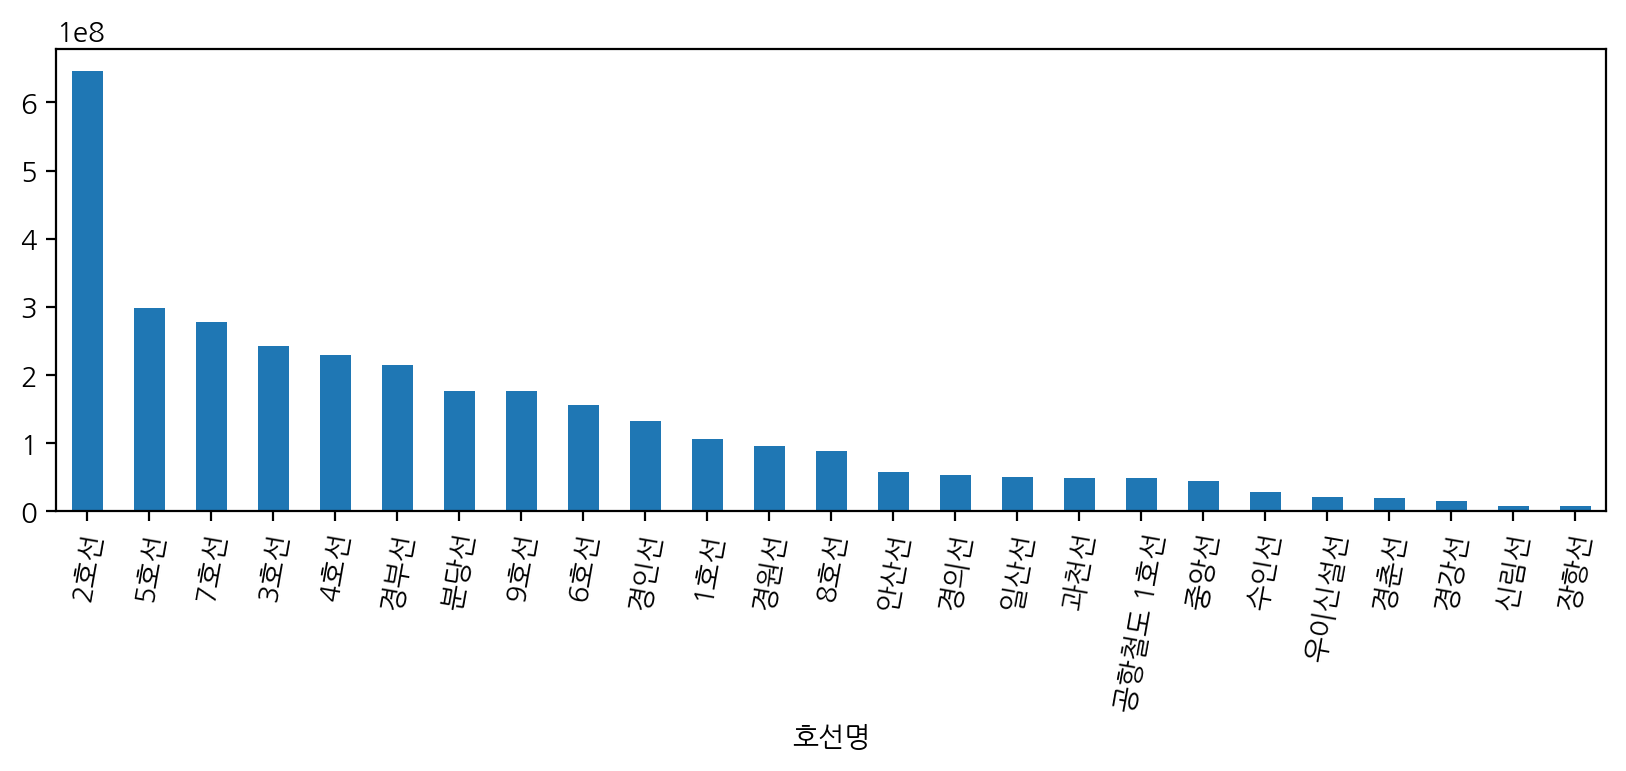

In [78]:
df.groupby('호선명')['승하차인원'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,3),rot=80)

In [70]:
df_station = df.groupby(['호선명','지하철역'])['승하차인원'].sum().sort_values(ascending=False)

<AxesSubplot:xlabel='호선명,지하철역'>

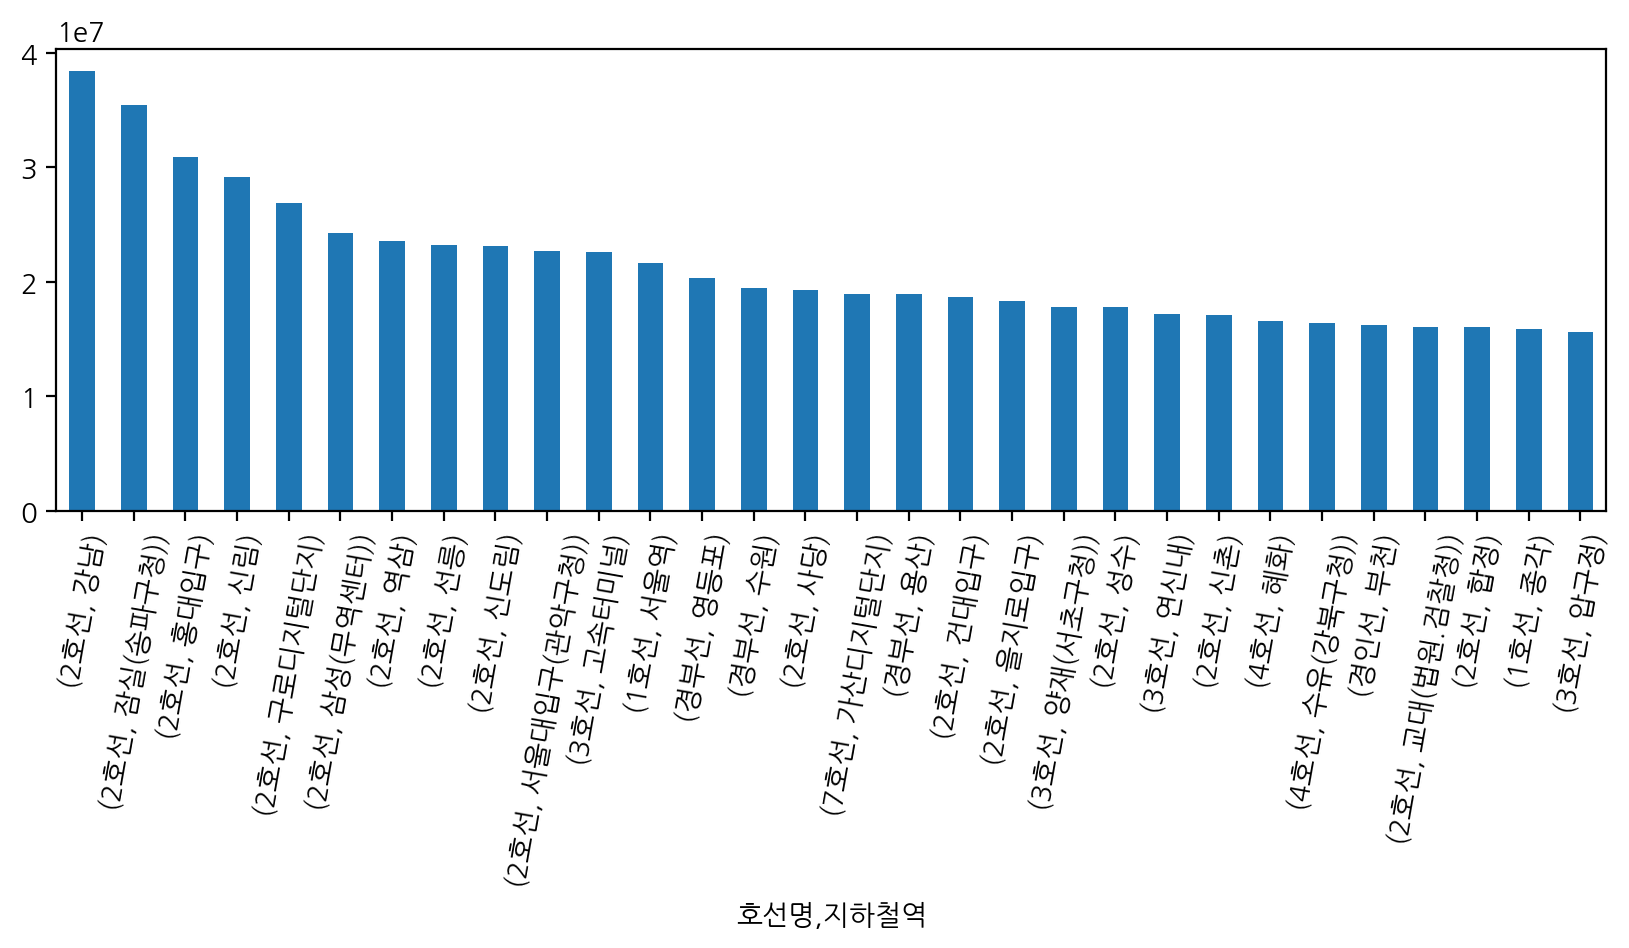

In [79]:
df_station[:30].sort_values(ascending=False).plot(kind='bar',figsize=(10,3),rot=80)

In [83]:
df['연도'] = df['사용월'].
df['월']

,사용월,호선명,지하철역,승하차인원,시간,승하차
0,2022-01,1호선,서울역,530,1,승차
1,2022-01,1호선,동묘앞,111,1,승차
2,2022-01,1호선,시청,27,1,승차
3,2022-01,1호선,종각,87,1,승차
4,2022-01,1호선,종로3가,124,1,승차
...,...,...,...,...,...,...
264571,2022-09,신림선,당곡,0,24,하차
264572,2022-09,신림선,신림,0,24,하차
264573,2022-09,신림선,서원,0,24,하차
264574,2022-09,신림선,서울대벤처타운,0,24,하차
